# Setup

In [1]:
# Image from Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install --quiet -U --no-cache-dir gdown --pre

In [3]:
import string
import re
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import keras.backend as K

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# import nltk

# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords


# nltk.download('punkt')

import seaborn as sns # untuk visualisasi
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# potongan kode di bawah adalah agar gambar graph yang 
# dihasilkan mempunyai kualitas yang cukup baik
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

In [4]:
abusive_lexicon = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Data/abusive.csv')
dataset = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Data/re_dataset.csv', encoding='latin-1')

eda_data = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Data/eda_sample.csv', encoding='latin-1')
model_data = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Data/model_data.csv', encoding='latin-1')

kamus_alay = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Data/kamusalay.csv', encoding='latin-1')
potensi_bias = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Data/potensi_bias.csv', encoding='latin-1')

ex_features_df = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Data/extracted_feature.csv', encoding='latin-1')

In [5]:
ex_features_df = ex_features_df.loc[:, ex_features_df.columns != 'Unnamed: 0']

In [6]:
eda_data

Unnamed: 0  dataset_id  \
0              0        2463   
1              1        2394   
2              2         340   
3              3         465   
4              4        4865   
...          ...         ...   
3287        3287        8161   
3288        3288         123   
3289        3289        7547   
3290        3290        9799   
3291        3291        2277   

                                                  Tweet  HS  Abusive  \
0     Faham betui betui maksud menegakkan agama Alla...   0        0   
1     Akankah Partai Bulan Bintang akan semakin meng...   0        0   
2     USER Tu yang saya katakan sejak dulu lagi kita...   0        0   
3     USER aku gakuat karna jijik makanya ku cepetin...   0        0   
4     Jd selama bininya om gue hamil, kunti ini udh ...   0        0   
...                                                 ...  ..      ...   
3287  USER keluarga halilintar hmm masa km gatau. udik'   1        1   
3288  #2019GantiPresiden scra konstitusional hak set...   1        1   
3289  USER si ahok pantasnya dinobatkan sbgai Babi n...   1        1   
3290  YA ALLAH INI XL GAK KURANG KAMPRET LAGI APA KO...   1        1   
3291  USER Den...den...\nNista banget hidup lo..\nUd...   1        1   

      HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0                 0         0            0        0            0          0   
1                 0         0            0        0            0          0   
2                 0         0            0        0            0          0   
3                 0         0            0        0            0          0   
4                 0         0            0        0            0          0   
...             ...       ...          ...      ...          ...        ...   
3287              1         0            0        0            0          0   
3288              1         0            0        0            0          0   
3289              1         0            0        0            0          0   
3290              0         1            0        0            0          0   
3291              1         0            0        0            0          0   

      HS_Other  HS_Weak  HS_Moderate  HS_Strong  
0            0        0            0          0  
1            0        0            0          0  
2            0        0            0          0  
3            0        0            0          0  
4            0        0            0          0  
...        ...      ...          ...        ...  
3287         1        1            0          0  
3288         1        1            0          0  
3289         1        1            0          0  
3290         1        0            1          0  
3291         1        1            0          0  

[3292 rows x 15 columns]

In [7]:
ex_features_df

Tweet  Exclamation  Abusive  \
0     Faham betui betui maksud menegakkan agama Alla...            0        0   
1     Akankah Partai Bulan Bintang akan semakin meng...            0        0   
2     USER Tu yang saya katakan sejak dulu lagi kita...            0        0   
3     USER aku gakuat karna jijik makanya ku cepetin...            0        1   
4     Jd selama bininya om gue hamil, kunti ini udh ...            0        1   
...                                                 ...          ...      ...   
3287  USER keluarga halilintar hmm masa km gatau. udik'            0        1   
3288  #2019GantiPresiden scra konstitusional hak set...            1        0   
3289  USER si ahok pantasnya dinobatkan sbgai Babi n...            0        1   
3290  YA ALLAH INI XL GAK KURANG KAMPRET LAGI APA KO...            0        1   
3291  USER Den...den...\nNista banget hidup lo..\nUd...            0        1   

      jokowi  islam  indonesia  prabowo  cina  ahok  presiden  ...  muka  \
0          0      0          0        0     0     0         0  ...     0   
1          0      0          0        0     0     0         0  ...     0   
2          0      0          0        0     1     0         0  ...     0   
3          0      0          0        0     0     0         0  ...     0   
4          0      0          0        0     0     0         0  ...     0   
...      ...    ...        ...      ...   ...   ...       ...  ...   ...   
3287       0      0          0        0     0     0         0  ...     0   
3288       0      0          0        0     0     0         0  ...     0   
3289       0      0          0        0     0     1         0  ...     0   
3290       0      0          0        0     0     0         0  ...     0   
3291       0      0          0        0     0     0         0  ...     0   

      paksa  lanjut  bandara  menteri  Length  Words  Uppercase  All Caps  HS  
0         0       0        0        0      74      6          2         0   0  
1         0       0        0        0      77      6          4         0   0  
2         0       0        0        0     135      9          6         0   0  
3         0       0        0        0     133     10          4         0   0  
4         0       0        0        0     174     14          2         0   0  
...     ...     ...      ...      ...     ...    ...        ...       ...  ..  
3287      0       0        0        0      49      5          4         0   1  
3288      0       0        0        0     118     11          3         0   1  
3289      0       0        0        0      52      5          5         0   1  
3290      0       0        0        0      61      5         49         1   1  
3291      0       0        0        0     232     23         12         0   1  

[3292 rows x 391 columns]

In [8]:
ex_features_df['A'] = eda_data['Abusive']

In [9]:
features_df = ex_features_df.loc[:, ex_features_df.columns != 'Tweet']
features_df = features_df.loc[:, features_df.columns != 'HS']

In [10]:
features_df

Exclamation  Abusive  jokowi  islam  indonesia  prabowo  cina  ahok  \
0               0        0       0      0          0        0     0     0   
1               0        0       0      0          0        0     0     0   
2               0        0       0      0          0        0     1     0   
3               0        1       0      0          0        0     0     0   
4               0        1       0      0          0        0     0     0   
...           ...      ...     ...    ...        ...      ...   ...   ...   
3287            0        1       0      0          0        0     0     0   
3288            1        0       0      0          0        0     0     0   
3289            0        1       0      0          0        0     0     1   
3290            0        1       0      0          0        0     0     0   
3291            0        1       0      0          0        0     0     0   

      presiden  kpk  ...  muka  paksa  lanjut  bandara  menteri  Length  \
0            0    0  ...     0      0       0        0        0      74   
1            0    0  ...     0      0       0        0        0      77   
2            0    0  ...     0      0       0        0        0     135   
3            0    0  ...     0      0       0        0        0     133   
4            0    0  ...     0      0       0        0        0     174   
...        ...  ...  ...   ...    ...     ...      ...      ...     ...   
3287         0    0  ...     0      0       0        0        0      49   
3288         0    0  ...     0      0       0        0        0     118   
3289         0    0  ...     0      0       0        0        0      52   
3290         0    0  ...     0      0       0        0        0      61   
3291         0    0  ...     0      0       0        0        0     232   

      Words  Uppercase  All Caps  A  
0         6          2         0  0  
1         6          4         0  0  
2         9          6         0  0  
3        10          4         0  0  
4        14          2         0  0  
...     ...        ...       ... ..  
3287      5          4         0  1  
3288     11          3         0  1  
3289      5          5         0  1  
3290      5         49         1  1  
3291     23         12         0  1  

[3292 rows x 390 columns]

# ANOVA f-test

In [11]:
data = features_df.values

X = data[:, :-1]
y = data[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (2205, 389) (2205,)
Test (1087, 389) (1087,)


## Feature Selection

In [12]:
# feature selection
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=f_classif, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

In [13]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
fs_list = []
for i in range(len(fs.scores_)):
 print('Feature %s: %f' % (features_df.columns[i], fs.scores_[i]))
 if fs.scores_[i] > 0:
  fs_list.append((features_df.columns[i], fs.scores_[i]))

Feature Exclamation: 20.110055
Feature Abusive: 863.490819
Feature jokowi: 37.646464
Feature islam: 14.117573
Feature indonesia: 25.119144
Feature prabowo: 7.542974
Feature cina: 4.016214
Feature ahok: 0.095100
Feature presiden: 27.984205
Feature kpk: 7.957374
Feature gubernur: 38.462441
Feature sby: 5.978638
Feature anies: 3.836571
Feature dpr: 5.978638
Feature muslim: 1.640267
Feature sandi: 7.764551
Feature anies-sandi: 2.973017
Feature rohingya: 2.572720
Feature kristen: 31.533762
Feature buddha: 5.810317
Feature myanmar: 3.864853
Feature china: 3.644260
Feature alay: 0.001730
Feature ampas: 0.200051
Feature buta: 2.169543
Feature keparat: 14.157136
Feature anjing: 41.476342
Feature anjir: 46.712694
Feature babi: 26.774810
Feature bacot: 25.183905
Feature bajingan: nan
Feature banci: 30.241821
Feature bandot: nan
Feature buaya: 6.460751
Feature bangkai: 1.992505
Feature bangsat: 23.762371
Feature bego: 25.183905
Feature bejat: 9.953738
Feature bencong: 9.405013
Feature berak: 3.120

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 30  32  64  72  73  95 106 107 109 113 124 129 135 138 139] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


## Feature Ranking

In [14]:
sorted_anova_fs = fs_list
sorted_anova_fs.sort(key = lambda i:i[1], reverse = True)
len(sorted_anova_fs)

374

In [15]:
sorted_anova_fs

[('Abusive', 863.4908194062502),
 ('cebong', 148.4593090814069),
 ('Length', 79.29269942971099),
 ('Words', 59.50479688978978),
 ('goblok', 55.09732272941384),
 ('kampret', 50.05443759533496),
 ('tolol', 50.05443759533496),
 ('anjir', 46.712693784996986),
 ('kontol', 41.73005782855407),
 ('bajing', 41.73005782855407),
 ('anjing', 41.47634233502745),
 ('gubernur', 38.46244074632886),
 ('dungu', 38.42812007858035),
 ('memek', 38.42812007858035),
 ('jokowi', 37.646464279376865),
 ('otak', 32.920592046427224),
 ('kristen', 31.533762133903572),
 ('banci', 30.241821267850764),
 ('kunyuk', 30.241821267850764),
 ('ngentot', 30.241821267850764),
 ('bodoh', 28.95780496339941),
 ('presiden', 27.98420451854762),
 ('asing', 27.932181731484942),
 ('setan', 27.239719564696824),
 ('babi', 26.77481003150012),
 ('bani', 26.77481003150012),
 ('budaya', 26.51965566357033),
 ('berengsek', 25.37648906686394),
 ('bacot', 25.183904543250843),
 ('bego', 25.183904543250843),
 ('indonesia', 25.119144267263906),


In [16]:
top_30_features = [sorted_anova_fs[i] for i in range(30)]

In [17]:
top_30_features

[('Abusive', 863.4908194062502),
 ('cebong', 148.4593090814069),
 ('Length', 79.29269942971099),
 ('Words', 59.50479688978978),
 ('goblok', 55.09732272941384),
 ('kampret', 50.05443759533496),
 ('tolol', 50.05443759533496),
 ('anjir', 46.712693784996986),
 ('kontol', 41.73005782855407),
 ('bajing', 41.73005782855407),
 ('anjing', 41.47634233502745),
 ('gubernur', 38.46244074632886),
 ('dungu', 38.42812007858035),
 ('memek', 38.42812007858035),
 ('jokowi', 37.646464279376865),
 ('otak', 32.920592046427224),
 ('kristen', 31.533762133903572),
 ('banci', 30.241821267850764),
 ('kunyuk', 30.241821267850764),
 ('ngentot', 30.241821267850764),
 ('bodoh', 28.95780496339941),
 ('presiden', 27.98420451854762),
 ('asing', 27.932181731484942),
 ('setan', 27.239719564696824),
 ('babi', 26.77481003150012),
 ('bani', 26.77481003150012),
 ('budaya', 26.51965566357033),
 ('berengsek', 25.37648906686394),
 ('bacot', 25.183904543250843),
 ('bego', 25.183904543250843)]

# LRA

In [18]:
import statsmodels.formula.api as smf

lra_model = smf.logit("""
    A ~
          Abusive
""", data = features_df)

results = lra_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.514899
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      A   No. Observations:                 3292
Model:                          Logit   Df Residuals:                     3290
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Jun 2023   Pseudo R-squ.:                  0.2262
Time:                        04:23:38   Log-Likelihood:                -1695.0
converged:                       True   LL-Null:                       -2190.5
Covariance Type:            nonrobust   LLR p-value:                1.751e-217
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2187      0.088    -25.198      0.000      -2.391      -2.046
Abusive        2.6621      0.100     26.563      0.000       2.466       2.858
==============================================================================
"""

In [50]:
lra_model = smf.logit("""
    A ~
          myanmar
""", data = features_df)

results = lra_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.664990
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      A   No. Observations:                 3292
Model:                          Logit   Df Residuals:                     3290
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Jun 2023   Pseudo R-squ.:               0.0006055
Time:                        04:54:39   Log-Likelihood:                -2189.1
converged:                       True   LL-Null:                       -2190.5
Covariance Type:            nonrobust   LLR p-value:                    0.1034
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4753      0.036    -13.242      0.000      -0.546      -0.405
myanmar       -1.4707      1.070     -1.375      0.169      -3.567       0.626
==============================================================================
"""

# SHAP

In [20]:
!pip install --quiet shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 8.0 MB/s eta 0:00:00


In [21]:
f30 = [i for i, j in top_30_features] 
f30

['Abusive',
 'cebong',
 'Length',
 'Words',
 'goblok',
 'kampret',
 'tolol',
 'anjir',
 'kontol',
 'bajing',
 'anjing',
 'gubernur',
 'dungu',
 'memek',
 'jokowi',
 'otak',
 'kristen',
 'banci',
 'kunyuk',
 'ngentot',
 'bodoh',
 'presiden',
 'asing',
 'setan',
 'babi',
 'bani',
 'budaya',
 'berengsek',
 'bacot',
 'bego']

In [22]:
df = pd.DataFrame(features_df["Abusive"], columns=["Abusive"])
for f in f30:
  df[f] = features_df.loc[:, f]
df['A'] = features_df.loc[:, "A"]

In [23]:
df

Abusive  cebong  Length  Words  goblok  kampret  tolol  anjir  kontol  \
0           0       0      74      6       0        0      0      0       0   
1           0       0      77      6       0        0      0      0       0   
2           0       0     135      9       0        0      0      0       0   
3           1       0     133     10       0        0      0      0       0   
4           1       0     174     14       0        0      0      0       0   
...       ...     ...     ...    ...     ...      ...    ...    ...     ...   
3287        1       0      49      5       0        0      0      0       0   
3288        0       0     118     11       0        0      0      0       0   
3289        1       0      52      5       0        0      0      0       0   
3290        1       0      61      5       0        1      0      0       0   
3291        1       0     232     23       0        0      0      0       0   

      bajing  ...  presiden  asing  setan  babi  bani  budaya  berengsek  \
0          0  ...         0      0      0     0     0       0          0   
1          0  ...         0      0      0     0     0       0          0   
2          0  ...         0      0      0     0     0       0          0   
3          0  ...         0      0      0     0     0       0          0   
4          0  ...         0      0      0     0     0       0          0   
...      ...  ...       ...    ...    ...   ...   ...     ...        ...   
3287       0  ...         0      0      0     0     0       0          0   
3288       0  ...         0      0      0     0     0       0          0   
3289       0  ...         0      0      0     1     0       0          0   
3290       0  ...         0      0      0     0     0       0          0   
3291       0  ...         0      0      0     0     0       0          0   

      bacot  bego  A  
0         0     0  0  
1         0     0  0  
2         0     0  0  
3         0     0  0  
4         0     0  0  
...     ...   ... ..  
3287      0     0  1  
3288      0     0  1  
3289      0     0  1  
3290      0     0  1  
3291      0     0  1  

[3292 rows x 31 columns]

In [24]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import shap

shap.initjs()

X = df.loc[:, df.columns != 'A']
y = df['A']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [25]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 660it [00:51, 11.32it/s]                         


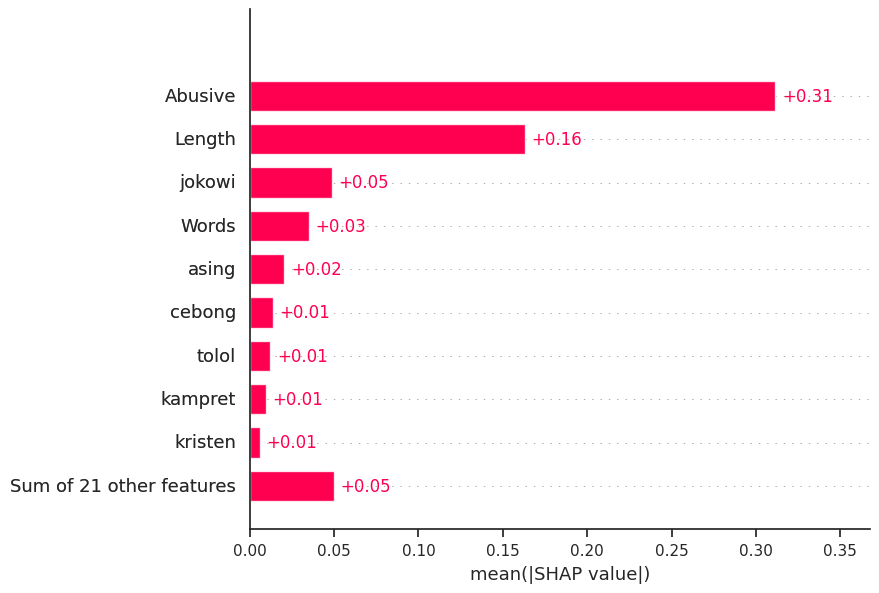

In [26]:
shap.plots.bar(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


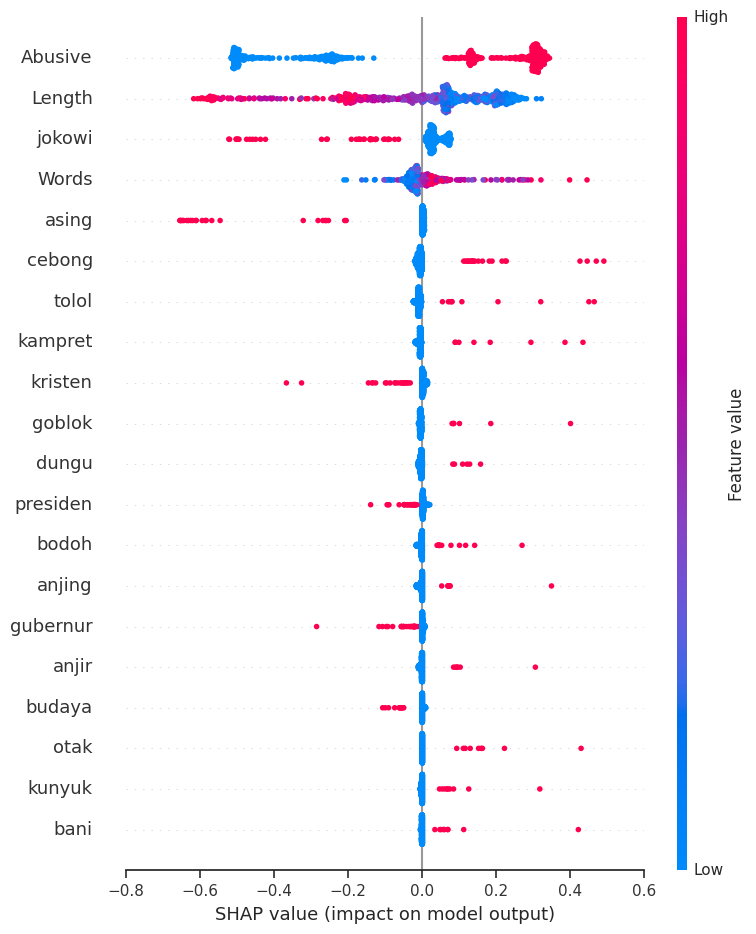

In [27]:
shap.summary_plot(shap_values)